<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-257_Machine_Learning/blob/main/%5BJocelyn_Baduria%5D_HW3_Fractal_Clustering_257_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Wrangling

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 1.1 Import Libraries and Read the Data from CSV

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl

In [97]:
path = '/content/drive/My Drive/Underdog/data/Asteroid_Updated.csv'

data = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
data.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


# 1.2 Data Cleaning and Preparation

## Check Missing and Drop Rows With No Data For Diameter and Rotation Period Data Feature . There are 83% Missing Diameter Data and 97% Missing Rotation Period Data

In [99]:
data.isnull().sum()/data.shape[0] * 100

name              97.383990
a                  0.000238
e                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
q                  0.000000
ad                 0.000715
per_y              0.000119
data_arc           1.842770
condition_code     0.103249
n_obs_used         0.000000
H                  0.320228
neo                0.000715
pha                1.958048
diameter          83.609181
extent            99.997856
albedo            83.755302
rot_per           97.761619
GM                99.998333
BV                99.878411
UB                99.883413
IR                99.999881
spec_B            99.801599
spec_T            99.883294
G                 99.985829
moid               1.958048
class              0.000000
n                  0.000238
per                0.000715
ma                 0.000953
dtype: float64

In [100]:
data.shape

(839714, 31)

In [101]:
data.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

## Drop Missing Rows Data for Diameter, Rotation Period, Albedo

In [102]:
data = data.dropna(subset=['diameter','rot_per','albedo'])
data.shape

(11154, 31)

In [103]:
data.isnull().sum()

name               5744
a                     0
e                     0
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc              0
condition_code        0
n_obs_used            0
H                     0
neo                   0
pha                   0
diameter              0
extent            11142
albedo                0
rot_per               0
GM                11142
BV                10176
UB                10216
IR                11153
spec_B            10044
spec_T            10217
G                 11037
moid                  0
class                 0
n                     0
per                   0
ma                    0
dtype: int64

## Drop Columns with missing data 

In [104]:
data.drop(['name', 'extent','IR','spec_B','spec_T'], axis=1, inplace=True)
data.isnull().sum()

a                     0
e                     0
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc              0
condition_code        0
n_obs_used            0
H                     0
neo                   0
pha                   0
diameter              0
albedo                0
rot_per               0
GM                11142
BV                10176
UB                10216
G                 11037
moid                  0
class                 0
n                     0
per                   0
ma                    0
dtype: int64

## Check the diameter and rotation period data if all Numeric. Diameter data is Object 

In [105]:
data.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
G                 float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [106]:
data.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,rot_per,GM,BV,UB,G,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,0.0900,9.074170,62.6284,0.713,0.426,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,0.1010,7.813200,14.3000,0.635,0.284,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,0.2140,7.210000,NaN,0.824,0.433,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,0.4228,5.342128,17.8000,0.782,0.492,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,0.2740,16.806000,NaN,0.826,0.411,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


## Convert Some Data to Float

In [107]:
data['diameter'] = data['diameter'].astype(float) 
data['condition_code'] = data['condition_code'].astype(float) 
#this will label as one hot vectors (neo and pha string values to int)
# data['neo'] = data['neo'].map({1: 'Y', 2: 'N'}).astype(float)
data['neo'] = data['neo'].astype('category').cat.codes
data['pha'] = data['pha'].astype('category').cat.codes
data['class'] = data['class'].astype('category').cat.codes
# data['pha'] = data['pha'].map({1: 'Y', 2: 'N'}).astype(float)
data.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
neo                  int8
pha                  int8
diameter          float64
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
G                 float64
moid              float64
class                int8
n                 float64
per               float64
ma                float64
dtype: object

In [108]:
data.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,rot_per,GM,BV,UB,G,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,0,0,939.400,0.0900,9.074170,62.6284,0.713,0.426,0.12,1.59478,6,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,0,0,545.000,0.1010,7.813200,14.3000,0.635,0.284,0.11,1.23324,6,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,0,0,246.596,0.2140,7.210000,NaN,0.824,0.433,0.32,1.03454,6,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,0,0,525.400,0.4228,5.342128,17.8000,0.782,0.492,0.32,1.13948,6,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0.0,2916,6.85,0,0,106.699,0.2740,16.806000,NaN,0.826,0.411,NaN,1.09589,6,0.238632,1508.600458,282.366289


In [109]:
data.round(1)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,rot_per,GM,BV,UB,G,moid,class,n,per,ma
0,2.8,0.1,10.6,80.3,73.6,2.6,3.0,4.6,8822.0,0.0,1002,3.3,0,0,939.4,0.1,9.1,62.6,0.7,0.4,0.1,1.6,6,0.2,1683.1,77.4
1,2.8,0.2,34.8,173.1,310.0,2.1,3.4,4.6,72318.0,0.0,8490,4.1,0,0,545.0,0.1,7.8,14.3,0.6,0.3,0.1,1.2,6,0.2,1686.2,59.7
2,2.7,0.3,13.0,169.9,248.1,2.0,3.4,4.4,72684.0,0.0,7104,5.3,0,0,246.6,0.2,7.2,NaN,0.8,0.4,0.3,1.0,6,0.2,1592.8,34.9
3,2.4,0.1,7.1,103.8,150.7,2.2,2.6,3.6,24288.0,0.0,9325,3.2,0,0,525.4,0.4,5.3,17.8,0.8,0.5,0.3,1.1,6,0.3,1325.4,95.9
4,2.6,0.2,5.4,141.6,358.7,2.1,3.1,4.1,63507.0,0.0,2916,6.8,0,0,106.7,0.3,16.8,NaN,0.8,0.4,NaN,1.1,6,0.2,1508.6,282.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694201,2.3,0.6,12.2,182.7,325.8,1.0,3.5,3.4,1038.0,1.0,529,19.3,1,1,0.7,0.1,2.9,NaN,NaN,NaN,NaN,0.0,1,0.3,1240.3,188.0
699814,2.3,0.6,25.5,178.8,82.0,1.0,3.5,3.4,227.0,3.0,563,18.8,1,0,0.5,0.3,6.0,NaN,NaN,NaN,NaN,0.3,1,0.3,1237.1,158.0
704641,0.9,0.3,26.4,257.6,144.5,0.6,1.1,0.8,1495.0,1.0,299,18.9,1,1,0.3,0.3,16.0,NaN,NaN,NaN,NaN,0.0,3,1.3,286.6,315.5
721964,2.8,0.7,23.8,277.5,115.4,0.9,4.6,4.6,8438.0,0.0,317,17.9,1,0,0.7,0.3,5.2,NaN,NaN,NaN,NaN,0.1,1,0.2,1678.0,350.9


In [110]:
data.isnull().sum()/data.shape[0] * 100

a                  0.000000
e                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
q                  0.000000
ad                 0.000000
per_y              0.000000
data_arc           0.000000
condition_code     0.000000
n_obs_used         0.000000
H                  0.000000
neo                0.000000
pha                0.000000
diameter           0.000000
albedo             0.000000
rot_per            0.000000
GM                99.892415
BV                91.231845
UB                91.590461
G                 98.951049
moid               0.000000
class              0.000000
n                  0.000000
per                0.000000
ma                 0.000000
dtype: float64

In [111]:
# Drop columns with NaN
data.drop(['GM','BV','UB','G'], axis=1, inplace=True)
data.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,rot_per,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,0,0,939.400,0.0900,9.074170,1.59478,6,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,0,0,545.000,0.1010,7.813200,1.23324,6,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,0,0,246.596,0.2140,7.210000,1.03454,6,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,0,0,525.400,0.4228,5.342128,1.13948,6,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0.0,2916,6.85,0,0,106.699,0.2740,16.806000,1.09589,6,0.238632,1508.600458,282.366289


# 1.3 Performing Feature Importance Using Random Forest Gini Index and Permutation Feature Importance


In [20]:
!pip install shap

In [21]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [22]:
# Load the data set and split for training and testing.
column_name=['a','e','i','om','w','q','ad','per_y','data_arc','condition_code','n_obs_used','H','neo','pha','diameter','albedo','rot_per',
                                'moid','class','n','per','ma']
X = pd.DataFrame(data, columns=column_name) 
y = pd.DataFrame(data, columns=column_name)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [ ]:
# print(X)

In [ ]:
# print(y)

In [22]:
# Fit the Random Forest Regressor with 100 Decision Trees:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
# To get the feature importances from the Random Forest model use the feature_importances_ argument:
rf.feature_importances_

array([5.08328073e-03, 3.98818602e-04, 1.34715508e-03, 1.83969464e-04,
       1.15778507e-04, 9.55284899e-04, 8.11487803e-03, 4.00978207e-03,
       9.41472065e-01, 5.38279103e-04, 2.15789600e-03, 7.37119460e-04,
       1.28910963e-05, 2.18123761e-06, 2.27331717e-03, 4.24803353e-05,
       1.80922891e-04, 1.79923002e-03, 7.99519630e-03, 1.51278698e-02,
       7.15978298e-03, 2.91821055e-04])

<BarContainer object of 22 artists>

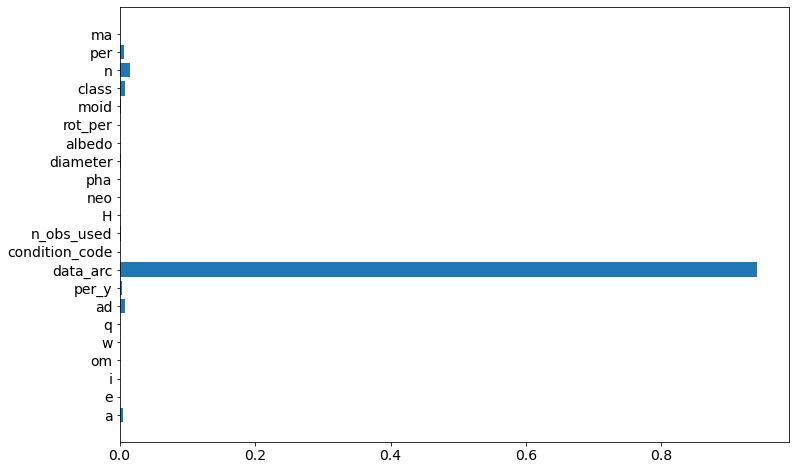

In [24]:
# Let’s plot the importances (chart will be easier to interpret than values).
plt.barh(data.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

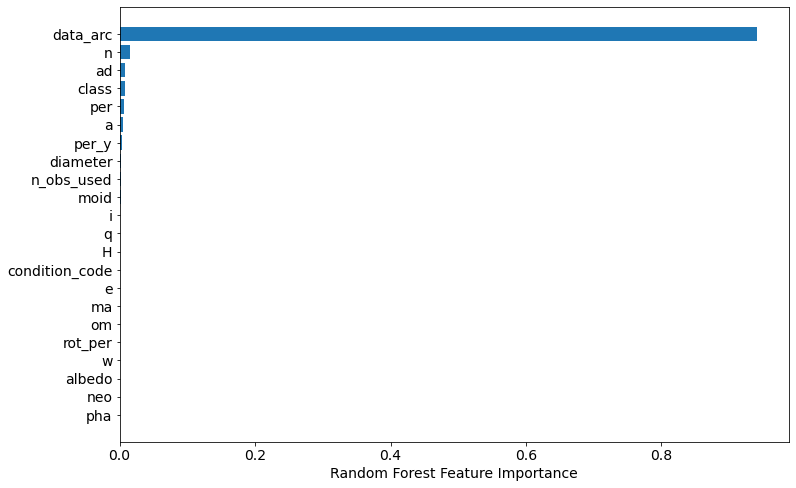

In [25]:
# To have an even better chart, let’s sort the features, and plot again:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(data.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [26]:
# Permutation-based Importance
# The permutation-based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. 
# It is implemented in scikit-learn as permutation_importance method.
perm_importance = permutation_importance(rf, X_test, y_test)

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually

Text(0.5, 0, 'Permutation Importance')

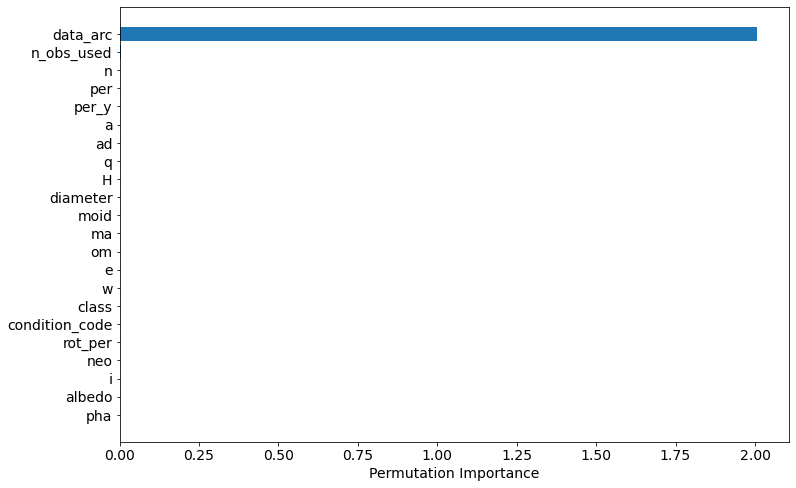

In [27]:
# Plot the importance:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(data.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# 2. Perform Fractal Kmeans Clustering on Diameter and Rotation Period data

In [112]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import StandardScaler

# 2.1 First Clustering Iteration

### Perform Elbow Method (SSE Within Clusters) and Silhouette Score
### silhouette score: 0.81
### sse withing cluster: 8968.0




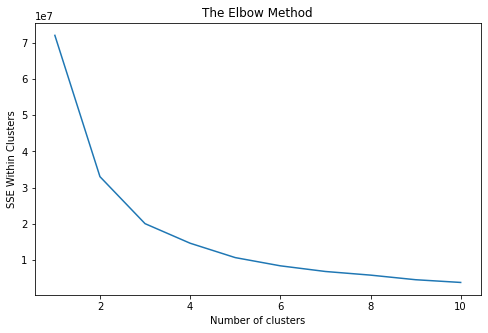

In [113]:
# Use diameter and rotation period for KMeans
X = data.iloc[:, [14, 16]].values
plt.figure(figsize=(8,5))
# Within-Cluster-Sum-of-Squares 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE Within Clusters')
plt.show()

In [114]:
def plot_cluster(n, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    # try:
    #     df.drop('cluster', axis=1, inplace=True)
    # except:
    #     next
    X = data.iloc[:, [14, 16]].values
    # Using Standard Scaler
    sc = StandardScaler()
    S_c = sc.fit_transform(X)
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(S_c)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(S_c, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

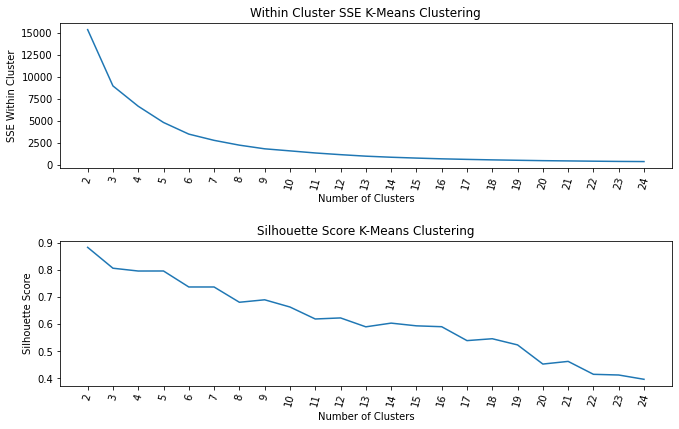

In [115]:
plot_cluster(X, max_loop=25)

In [116]:
def apply_cluster(n, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    # try:
    #     df.drop('cluster', axis=1, inplace=True)
    # except:
    #     next
    X = data.iloc[:, [14, 16]].values
    # Standard Scaler
    sc = StandardScaler()
    S_c = sc.fit_transform(X)

    kmeans = KMeans(n_clusters = clusters, init = 'k-means++', random_state = 42) 
    y_kmeans = kmeans.fit_predict(S_c)
    score = metrics.silhouette_score(S_c, kmeans.labels_, random_state=10)
    # df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return n

In [117]:
# Using clusters = 3
first_trial = apply_cluster(X, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.81
sse withing cluster: 8968.0


### First Kmeans Clustering Using Three Clusters

In [118]:
# Performing Kmeans using Clusters = 3
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, [14, 16]].values
# Standard Scaler
sc = StandardScaler()
S_c = sc.fit_transform(X)

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(S_c)

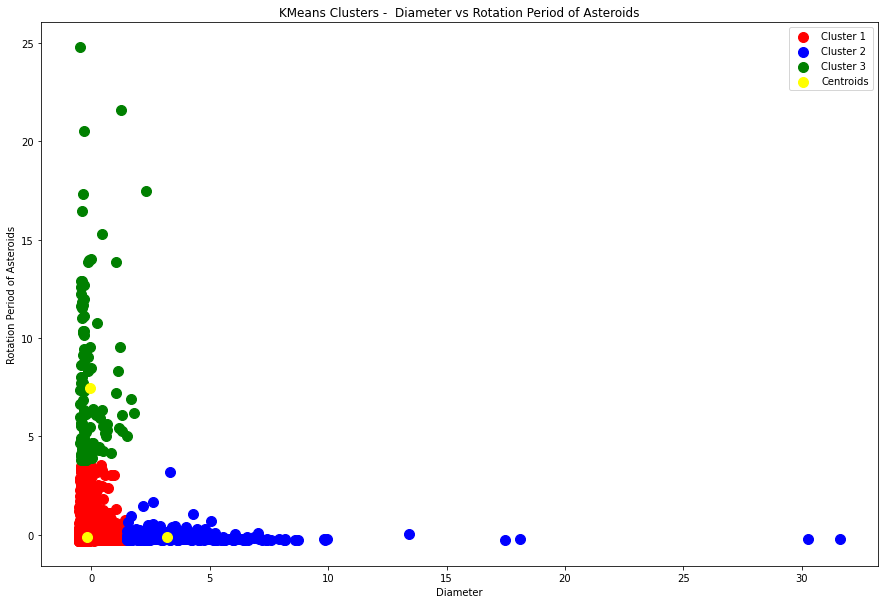

In [119]:
plt.figure(figsize=(15,10))
plt.scatter(S_c[y_kmeans == 0, 0], S_c[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(S_c[y_kmeans == 1, 0], S_c[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(S_c[y_kmeans == 2, 0], S_c[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters -  Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
# plt.xticks([i for i in range(0, 10)], rotation=360)
# plt.yticks([i for i in range(0, 10)], rotation=360)
plt.legend()
plt.show()

### First Fractal Clustering of Three Clusters
### Cluster 0 have biggest number of cluster 10433 for diameter and rotation period data



In [120]:
Cl3 = data[['diameter', 'rot_per']] 

In [121]:
new = data._get_numeric_data().dropna(axis=1)
Cl3['Clustered3'] = pd.Series(y_kmeans, index=data.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
cluster3_perf = (
     Cl3
    .groupby('Clustered3')
    .agg({"diameter":"count", "rot_per":"count"})
    .sort_values('diameter')
    .reset_index()
)

cluster3_perf

,Clustered3,diameter,rot_per
0,2,123,123
1,1,598,598
2,0,10433,10433


In [123]:
# creating a dataframe that only consists of cluster `0` with highest count cluster
clusterF3_sub = Cl3.query("Clustered3 == 0").reset_index(drop=True)
clusterF3_sub = clusterF3_sub.drop('Clustered3',axis = 1)
clusterF3_sub


,diameter,rot_per
0,52.929,18.6080
1,43.218,25.2080
2,58.292,8.7520
3,56.309,15.8530
4,44.590,8.2970
...,...,...
10428,0.653,2.8849
10429,0.453,5.9600
10430,0.325,16.0000
10431,0.694,5.2060


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e61e2bcf8>,
      dtype=object)

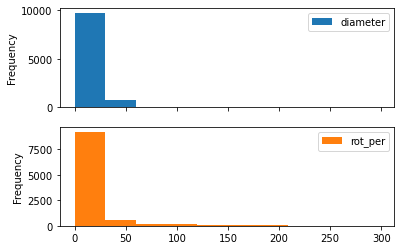

In [124]:
clusterF3_sub[["diameter", "rot_per"]].plot(bins=10, kind="hist", subplots=True)

# 2.2 Second Clustering Iteration

### Perform Elbow Method (SSE Within Clusters) and Silhouette Score
### silhouette score: 0.8
### sse withing cluster: 4829.0

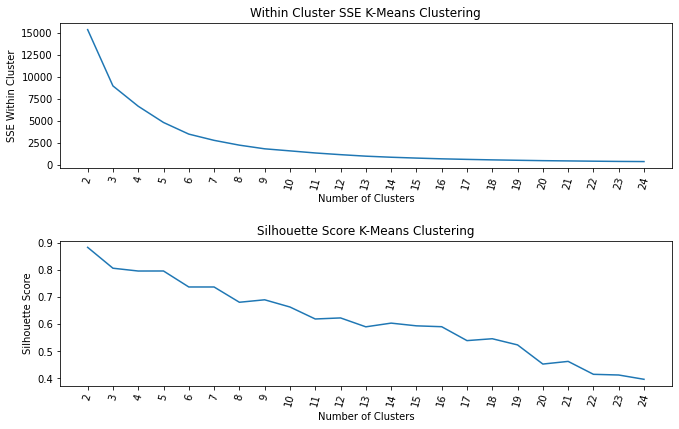

In [125]:
## Performed SSE and Silhouette Score on Three Clusters
plot_cluster(clusterF3_sub, max_loop=25)

In [126]:
second_trial = apply_cluster(clusterF3_sub, clusters=5)

clustering performance
-----------------------------------
silhouette score: 0.8
sse withing cluster: 4829.0


### Second Kmeans Clustering Of Cluster 0 with highest cluster 10433

In [127]:
# Performing Kmeans using Clusters = 5
from sklearn.preprocessing import StandardScaler
# X = data.iloc[:, [14, 16]].values
# Standard Scaler
sc = StandardScaler()
S_c = sc.fit_transform(clusterF3_sub)

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_5 = kmeans.fit_predict(S_c)

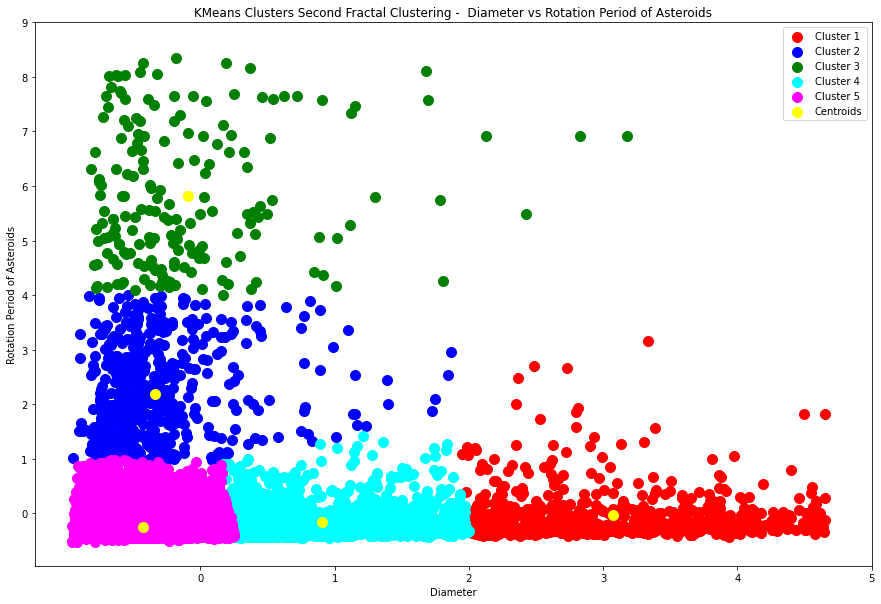

In [128]:
plt.figure(figsize=(15,10))
plt.scatter(S_c[y_kmeans_5 == 0, 0], S_c[y_kmeans_5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(S_c[y_kmeans_5 == 1, 0], S_c[y_kmeans_5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(S_c[y_kmeans_5 == 2, 0], S_c[y_kmeans_5 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(S_c[y_kmeans_5 == 3, 0], S_c[y_kmeans_5 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(S_c[y_kmeans_5 == 4, 0], S_c[y_kmeans_5 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters Second Fractal Clustering -  Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
plt.xticks([i for i in range(0, 6)], rotation=360)
plt.yticks([i for i in range(0, 10)], rotation=360)
plt.legend()
plt.show()

### Second Fractal Clustering Of Five Clusters from previous Three Clusters
### Cluster 4 have biggest number of clustered data 7538 for diameter and rotation period


In [134]:
Cl5 = clusterF3_sub[['diameter', 'rot_per']] 

In [135]:
new = clusterF3_sub._get_numeric_data().dropna(axis=1)
Cl5['Clustered5'] = pd.Series(y_kmeans_5, index=clusterF3_sub.index)

In [136]:
cluster5_perf = (
     Cl5
    .groupby('Clustered5')
    .agg({"diameter":"count", "rot_per":"count"})
    .sort_values('diameter')
    .reset_index()
)

cluster5_perf

,Clustered5,diameter,rot_per
0,2,181,181
1,1,509,509
2,0,664,664
3,3,1541,1541
4,4,7538,7538


In [137]:
# creating a dataframe that only consists of cluster `4` with highest count cluster
cluster4_sub = Cl5.query("Clustered5 == 4").reset_index(drop=True)
cluster4_sub = cluster4_sub.drop('Clustered5',axis = 1)
cluster4_sub

,diameter,rot_per
0,9.300,6.4840
1,12.467,5.8949
2,11.036,4.3480
3,9.822,13.8070
4,10.456,4.3130
...,...,...
7533,0.653,2.8849
7534,0.453,5.9600
7535,0.325,16.0000
7536,0.694,5.2060


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e61c255c0>,
      dtype=object)

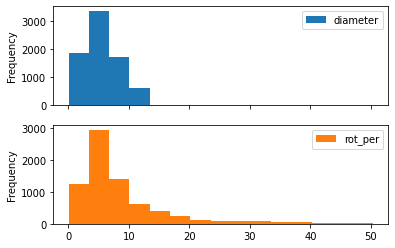

In [138]:
cluster4_sub[["diameter", "rot_per"]].plot(bins=15, kind="hist", subplots=True)

## 2.3 Third Cluster Iteration

### Perform Elbow Method (SSE Within Clusters) and Silhouette Score
### silhouette score: 0.8
### sse withing cluster: 4829.0


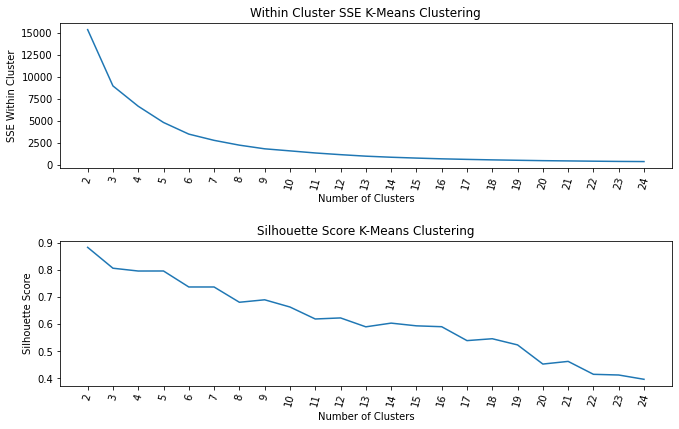

In [139]:
plot_cluster(cluster4_sub, max_loop=25)

In [140]:
third_trial = apply_cluster(cluster4_sub, clusters=5)

clustering performance
-----------------------------------
silhouette score: 0.8
sse withing cluster: 4829.0


### Third Kmeans Clustering Of Cluster 4 with highest cluster 7538
 

In [141]:
# Performing Kmeans using Clusters = 5
from sklearn.preprocessing import StandardScaler
# X = data.iloc[:, [14, 16]].values
# Standard Scaler
sc = StandardScaler()
S_c = sc.fit_transform(cluster4_sub)

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_5 = kmeans.fit_predict(S_c)

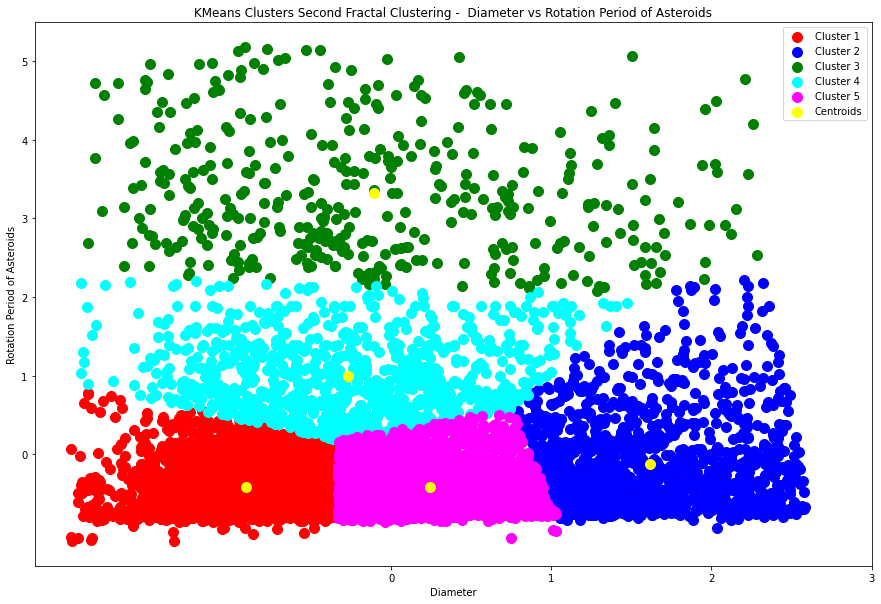

In [142]:
plt.figure(figsize=(15,10))
plt.scatter(S_c[y_kmeans_5 == 0, 0], S_c[y_kmeans_5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(S_c[y_kmeans_5 == 1, 0], S_c[y_kmeans_5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(S_c[y_kmeans_5 == 2, 0], S_c[y_kmeans_5 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(S_c[y_kmeans_5 == 3, 0], S_c[y_kmeans_5 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(S_c[y_kmeans_5 == 4, 0], S_c[y_kmeans_5 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters Second Fractal Clustering -  Diameter vs Rotation Period of Asteroids')
plt.xlabel('Diameter')
plt.ylabel('Rotation Period of Asteroids')
plt.xticks([i for i in range(0, 4)], rotation=360)
plt.yticks([i for i in range(0, 6)], rotation=360)
plt.legend()
plt.show()

### Third Fractal Clustering of Five Clusters from previous Five Clusters
### Found Three Golden Clusters after third Kmeans cluster iteration
### Cluster 1-(1318), Cluster 4-(2291), Cluster 0-(2650) diameter and rotation data

In [156]:
Cl3 = cluster4_sub[['diameter', 'rot_per']] 

In [157]:
new = cluster4_sub._get_numeric_data().dropna(axis=1)
Cl3['Clustered5_2'] = pd.Series(y_kmeans_5, index=cluster4_sub.index)

In [158]:
cluster5_2_perf = (
     Cl3
    .groupby('Clustered5_2')
    .agg({"diameter":"count", "rot_per":"count"})
    .sort_values('diameter')
    .reset_index()
)

cluster5_2_perf

,Clustered5_2,diameter,rot_per
0,2,400,400
1,3,879,879
2,1,1318,1318
3,4,2291,2291
4,0,2650,2650


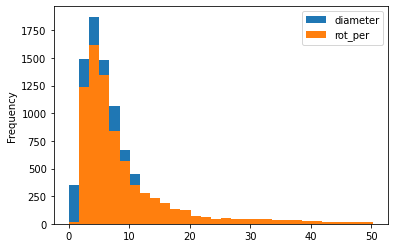

In [159]:
Cl3[["diameter", "rot_per"]].plot(bins=30, kind="hist")

In [160]:
# creating a dataframe that only consists of cluster `1` with highest count cluster
cluster4_1_sub = Cl3.query("Clustered5_2 == 1").reset_index(drop=True)
cluster4_1_sub = cluster4_1_sub.drop('Clustered5_2',axis = 1)
cluster4_1_sub

,diameter,rot_per
0,9.300,6.4840
1,12.467,5.8949
2,11.036,4.3480
3,9.822,13.8070
4,10.456,4.3130
...,...,...
1313,9.012,7.7040
1314,12.541,7.8960
1315,11.676,18.0000
1316,8.329,8.4450


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e5a77a0f0>,
      dtype=object)

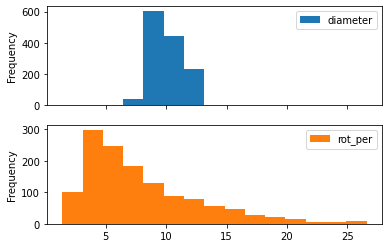

In [162]:
cluster4_1_sub[["diameter", "rot_per"]].plot(bins=15, kind="hist", subplots=True)

In [163]:
# creating a dataframe that only consists of cluster `4` with highest count cluster
cluster4_4_sub = Cl3.query("Clustered5_2 == 4").reset_index(drop=True)
cluster4_4_sub = cluster4_4_sub.drop('Clustered5_2',axis = 1)
cluster4_4_sub

,diameter,rot_per
0,8.196,4.5385
1,6.534,5.3450
2,8.153,3.1259
3,7.726,10.4810
4,5.887,5.5783
...,...,...
2286,5.092,5.9660
2287,7.199,10.4810
2288,5.600,4.8005
2289,6.082,4.2100


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e5a671f60>,
      dtype=object)

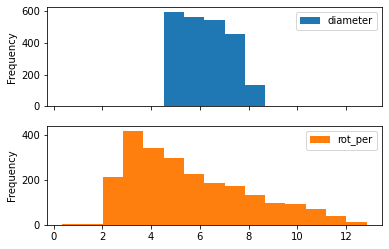

In [164]:
cluster4_4_sub[["diameter", "rot_per"]].plot(bins=15, kind="hist", subplots=True)

In [165]:
# creating a dataframe that only consists of cluster `0` with highest count cluster
cluster4_0_sub = Cl3.query("Clustered5_2 == 0").reset_index(drop=True)
cluster4_0_sub = cluster4_0_sub.drop('Clustered5_2',axis = 1)
cluster4_0_sub

,diameter,rot_per
0,2.529,2.660000
1,4.605,3.588000
2,4.276,2.971200
3,1.000,2.272600
4,2.560,5.222040
...,...,...
2645,0.055,0.029952
2646,0.653,2.884900
2647,0.453,5.960000
2648,0.694,5.206000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e5a582f28>,
      dtype=object)

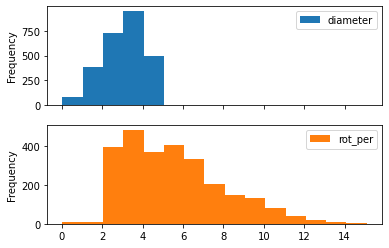

In [166]:
cluster4_0_sub[["diameter", "rot_per"]].plot(bins=15, kind="hist", subplots=True)

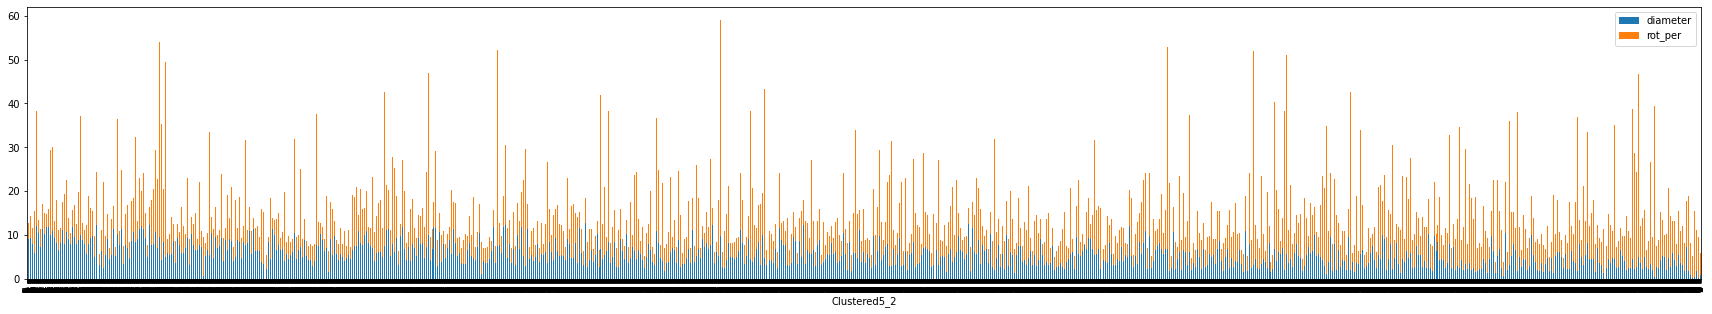

In [167]:
Cl3.set_index('Clustered5_2').plot(kind='bar', stacked=True, figsize=(30,5))
plt.legend(['diameter', 'rot_per'], prop={"size":10})

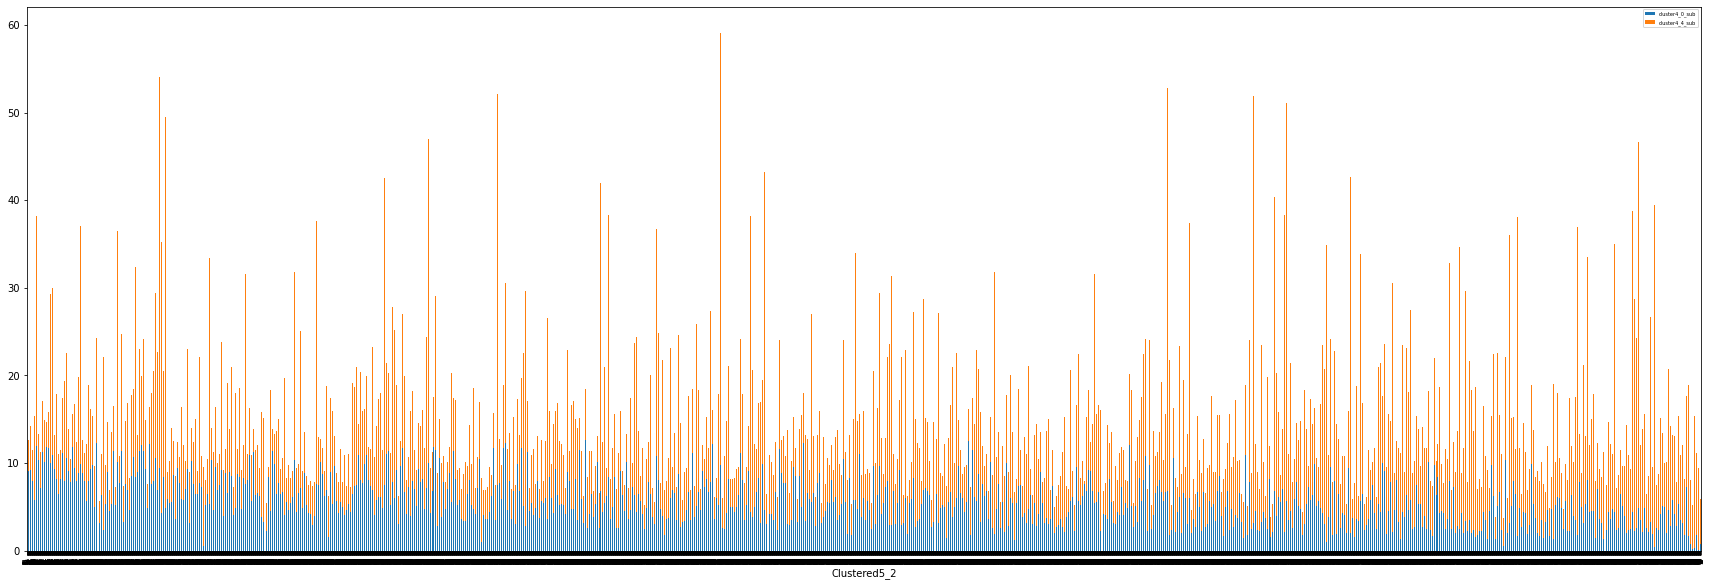

In [172]:
Cl3.set_index('Clustered5_2').plot(kind='bar', stacked=True, figsize=(30,10))
plt.legend(["cluster4_0_sub", "cluster4_4_sub", "cluster4_1_sub"], prop={"size":5})